In [12]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The goal of this analysis is to see how well elections data adhere's to Benford's law,

In [44]:
df = pd.read_csv('countypres_2000-2016.csv')
df = df[pd.isna(df['candidatevotes']) == 0]

In [45]:
e2016 = df[df['year'] == 2016]

In [46]:
e2016

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
40517,2016,Alabama,AL,Autauga,1001.0,President,Hillary Clinton,democrat,5936.0,24973,20191203
40518,2016,Alabama,AL,Autauga,1001.0,President,Donald Trump,republican,18172.0,24973,20191203
40519,2016,Alabama,AL,Autauga,1001.0,President,Other,NaN,865.0,24973,20191203
40520,2016,Alabama,AL,Baldwin,1003.0,President,Hillary Clinton,democrat,18458.0,95215,20191203
40521,2016,Alabama,AL,Baldwin,1003.0,President,Donald Trump,republican,72883.0,95215,20191203
...,...,...,...,...,...,...,...,...,...,...,...
50519,2016,Alaska,AK,District 40,2040.0,President,Donald Trump,republican,1377.0,4610,20191203
50520,2016,Alaska,AK,District 40,2040.0,President,Other,NaN,895.0,4610,20191203
50521,2016,Alaska,NaN,District 99,2099.0,President,Hillary Clinton,democrat,274.0,5056,20191203
50522,2016,Alaska,NaN,District 99,2099.0,President,Donald Trump,republican,40.0,5056,20191203


In [98]:
clinton_votes = np.array(e2016[e2016['party'] == 'democrat']['candidatevotes'])
trump_votes = np.array(e2016[e2016['party'] == 'republican']['candidatevotes'])

In [99]:
clinton_digits = np.array([int(str(clinton_votes[i])[0]) for i in range(len(clinton_votes))])
trump_digits = np.array([int(str(trump_votes[i])[0]) for i in range(len(trump_votes))])

In [105]:
def count(arr):
    data = np.zeros(10)
    for i in range(len(arr)):
        data[arr[i]] += 1
    return data

In [118]:
idx = np.arange(10)
idx1 = np.arange(1,10)
clinton_counts = count(clinton_digits)
trump_counts = count(trump_digits)

<IPython.core.display.Javascript object>


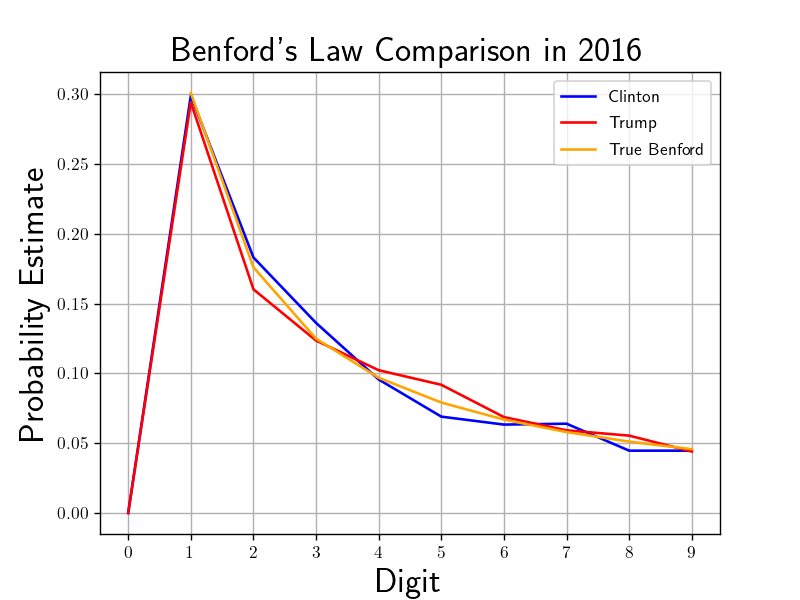

In [141]:
fig,ax = plt.subplots(1,1)
ax.plot(idx, clinton_counts/np.sum(clinton_counts),'-b',label='Clinton')
ax.plot(idx, trump_counts/np.sum(trump_counts),'-r',label = 'Trump')
ax.plot(idx1, np.log10(1 + 1/idx1),color = 'orange',label = 'True Benford')
ax.set_xticks(list(range(10)))
ax.grid()
ax.set_xlabel("Digit",fontsize=20)
ax.set_ylabel("Probability Estimate",fontsize=20)
ax.set_title("Benford's Law Comparison in 2016",fontsize=20)
ax.legend()
fig.savefig("benford.jpg")

In [316]:
state_list = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [344]:
dem_digits = np.zeros((1,10))
rep_digits = np.zeros((1,10))
for state in state_list:
    state_filtered = df[df['state'] == state]
    demcount = np.array(state_filtered[state_filtered['party'] == 'democrat']['candidatevotes'])
    dem_digits_tmp = count(np.array([int(str(demcount[i])[0]) for i in range(len(demcount))]))
    repcount = np.array(state_filtered[state_filtered['party'] == 'republican']['candidatevotes'])
    rep_digits_tmp = count(np.array([int(str(repcount[i])[0]) for i in range(len(repcount))]))
    dem_digits = np.concatenate([dem_digits, dem_digits_tmp.reshape((1,-1))],axis=0)
    rep_digits = np.concatenate([rep_digits, rep_digits_tmp.reshape((1,-1))],axis=0)
dem_digits = dem_digits[1::,:]
rep_digits = rep_digits[1::,:]

In [345]:
demsums = np.sum(dem_digits,1).reshape((-1,1))
repsums = np.sum(rep_digits,1).reshape((-1,1))

In [346]:
true_ben = np.log10(1 + 1/idx)
true_ben[0] = 0
benford_matrix = np.repeat(true_ben,50, axis=0).reshape((-1,50)).T
dem_benford = benford_matrix * demsums
rep_benford = benford_matrix * repsums

<ipython-input-346-2fa9630513a5>:1: RuntimeWarning: divide by zero encountered in true_divide
  true_ben = np.log10(1 + 1/idx)


In [347]:
dem_chi_squared = (dem_benford - dem_digits)**2/dem_benford
dem_chi_squared[:,0] = 0
rep_chi_squared = (rep_benford - rep_digits)**2/rep_benford
rep_chi_squared[:,0] = 0

<ipython-input-347-5bc29c3ffc6d>:1: RuntimeWarning: invalid value encountered in true_divide
  dem_chi_squared = (dem_benford - dem_digits)**2/dem_benford
<ipython-input-347-5bc29c3ffc6d>:3: RuntimeWarning: invalid value encountered in true_divide
  rep_chi_squared = (rep_benford - rep_digits)**2/rep_benford


In [348]:
dem_chi_squared = np.sum(dem_chi_squared,1)
rep_chi_squared = np.sum(rep_chi_squared,1)

In [349]:
dem_idx = np.argsort(dem_chi_squared)
rep_idx = np.argsort(rep_chi_squared)

In [350]:
stateframe = pd.DataFrame({"State": state_list, "Democratic Chi-Squared": dem_chi_squared, "Republican Chi-Squared": rep_chi_squared})

In [351]:
sorted_stateframe = stateframe.sort_values(by='Democratic Chi-Squared')

In [352]:
sorted_stateframes

,State,Democratic Chi-Squared,Republican Chi-Squared
30,New Mexico,2.604070,24.012482
43,Utah,3.197436,8.506781
22,Minnesota,3.272428,9.023652
36,Oregon,3.837819,49.138818
35,Oklahoma,5.569660,21.295893
19,Maryland,6.463771,20.740825
12,Illinois,6.533342,47.413037
47,West Virginia,6.887144,14.967973
5,Colorado,7.144071,13.974801
33,North Dakota,7.151662,36.603673


<IPython.core.display.Javascript object>


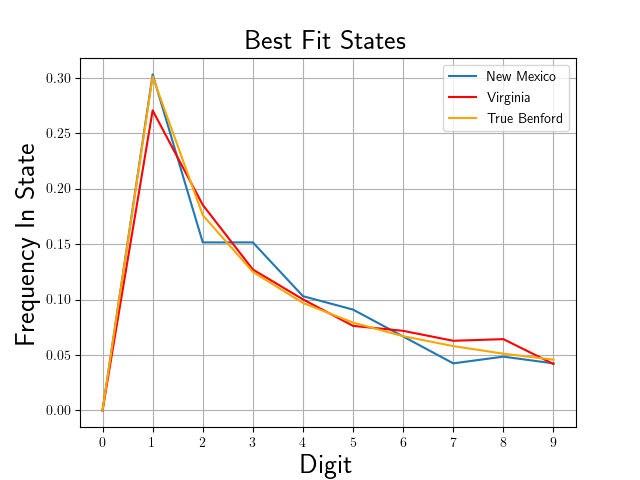

In [392]:
minidxd = dem_idx[0]
minidxr = rep_idx[0]
fig3,ax3 = plt.subplots(1,1)
ax3.plot(np.arange(10),dem_digits[minidxd,:]/np.sum(dem_digits[minidxd,:]), label = state_list[minidxd],color = '#1f77b4')
ax3.plot(np.arange(10),rep_digits[minidxr,:]/np.sum(rep_digits[minidxr,:]), label = state_list[minidxr],color = 'red')
ax3.plot(np.arange(10),true_ben,color='orange',label='True Benford')
ax3.set_xlabel('Digit',fontsize=20)
ax3.set_xticks(list(range(10)))
ax3.set_ylabel("Frequency In State",fontsize=20)
ax3.legend()
ax3.set_title("Best Fit States",fontsize=20)
ax3.grid()
fig3.savefig("bestfit.jpg")

In [374]:
#Next Worst Fit States

<IPython.core.display.Javascript object>


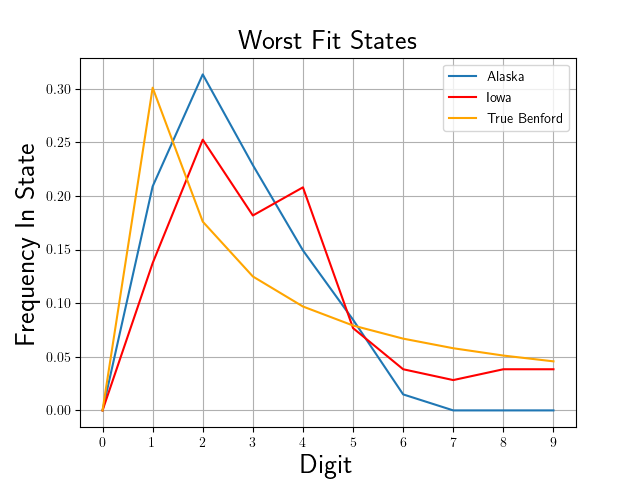

In [391]:
maxidxd = dem_idx[-1]
maxidxr = rep_idx[-1]
fig4,ax4 = plt.subplots(1,1)
ax4.plot(np.arange(10),dem_digits[maxidxd,:]/np.sum(dem_digits[maxidxd,:]), label = state_list[maxidxd],color='#1f77b4')
ax4.plot(np.arange(10),rep_digits[maxidxr,:]/np.sum(rep_digits[maxidxr,:]), label = state_list[maxidxr],color='red')
ax4.plot(np.arange(10),true_ben,color='orange',label='True Benford')
ax4.set_xlabel('Digit',fontsize=20)
ax4.set_xticks(list(range(10)))
ax4.set_ylabel("Frequency In State",fontsize=20)
ax4.legend()
ax4.set_title("Worst Fit States",fontsize=20)
ax4.grid()
fig4.savefig("worstfit.jpg")